# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

In [1]:
import pandas as pd

sheet_names = ['descriptions', 'hedge_fund_series', 'merrill_factors', 'other_data']
proshares_analysis_data = {}

for sheet in sheet_names:
    proshares_analysis_data[sheet] = pd.read_excel(
        r'/Users/arohansharma/Desktop/assignments/finm-portfolio-2024/data/proshares_analysis_data.xlsx', 
        header=0, index_col=0, sheet_name=sheet)

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [2]:
print('Mean (Annualised):')
mean_returns_hf_series = proshares_analysis_data['hedge_fund_series'].mean()
display(mean_returns_hf_series*12)
print('Volatility (Annualised):')
vol_returns_hf_series = proshares_analysis_data['hedge_fund_series'].std()
display(vol_returns_hf_series*(12**0.5))
print('Sharpe (Annualised):')
display((12**0.5)*mean_returns_hf_series/vol_returns_hf_series)

Mean (Annualised):


HFRIFWI Index     0.048295
MLEIFCTR Index    0.036286
MLEIFCTX Index    0.034605
HDG US Equity     0.024812
QAI US Equity     0.025653
dtype: float64

Volatility (Annualised):


HFRIFWI Index     0.059476
MLEIFCTR Index    0.056136
MLEIFCTX Index    0.055980
HDG US Equity     0.058408
QAI US Equity     0.050009
dtype: float64

Sharpe (Annualised):


HFRIFWI Index     0.812004
MLEIFCTR Index    0.646398
MLEIFCTX Index    0.618172
HDG US Equity     0.424805
QAI US Equity     0.512971
dtype: float64

## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [3]:
def cvar(series):
    s = series.loc[series <= series.quantile(0.05)]
    return s.mean()

def max_drawdown(series):
    
    cum_val = series.cumsum()
    high_val = cum_val.cummax()
    drawdown = cum_val - high_val
    md = drawdown.min()
    max_drawdown_idx = drawdown.idxmin()
    high_val_at_max_drawdown = high_val[drawdown.idxmin()]
    start_date = high_val[high_val == high_val_at_max_drawdown].index[0]
    end_date = high_val[high_val == high_val_at_max_drawdown].index[-1]
    recovery = end_date - start_date
    return pd.Series(data=[md, start_date, max_drawdown_idx.date(), end_date, recovery.days], 
                     index=['Max Drawdown', 'Start Date', 'Low Date', 'Recovery Date', 'Recovery Period'])

print('Skewness')
hf_series_skewness = proshares_analysis_data['hedge_fund_series'].skew()
display(hf_series_skewness)
print('Kurtosis')
hf_series_kurtosis = proshares_analysis_data['hedge_fund_series'].kurtosis()
display(hf_series_kurtosis)
print('VaR(0.05)')
hf_series_var = proshares_analysis_data['hedge_fund_series'].quantile(0.05)
display(hf_series_var)
print('CVaR(0.05)')
hf_series_cvar = proshares_analysis_data['hedge_fund_series'].apply(cvar)
display(hf_series_cvar)
print('Max Drawdown')
proshares_analysis_data['hedge_fund_series'].apply(max_drawdown)

Skewness


HFRIFWI Index    -0.963318
MLEIFCTR Index   -0.265394
MLEIFCTX Index   -0.251279
HDG US Equity    -0.254201
QAI US Equity    -0.434775
dtype: float64

Kurtosis


HFRIFWI Index     5.763074
MLEIFCTR Index    1.631580
MLEIFCTX Index    1.595863
HDG US Equity     1.759250
QAI US Equity     1.605934
dtype: float64

VaR(0.05)


HFRIFWI Index    -0.024293
MLEIFCTR Index   -0.028189
MLEIFCTX Index   -0.028095
HDG US Equity    -0.030932
QAI US Equity    -0.017895
Name: 0.05, dtype: float64

CVaR(0.05)


HFRIFWI Index    -0.037478
MLEIFCTR Index   -0.035857
MLEIFCTX Index   -0.035816
HDG US Equity    -0.037575
QAI US Equity    -0.032695
dtype: float64

Max Drawdown


,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Max Drawdown,-0.11804,-0.129428,-0.129539,-0.148219,-0.14541
Start Date,2019-12-31 00:00:00,2021-06-30 00:00:00,2021-06-30 00:00:00,2021-06-30 00:00:00,2021-06-30 00:00:00
Low Date,2020-03-31,2022-09-30,2022-09-30,2022-09-30,2022-09-30
Recovery Date,2020-06-30 00:00:00,2023-11-30 00:00:00,2024-01-31 00:00:00,2024-06-30 00:00:00,2024-01-31 00:00:00
Recovery Period,182,883,945,1096,945


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [4]:
import scipy as sc

def spy_regression(series):
    spy_returns = proshares_analysis_data['merrill_factors']['SPY US Equity']
    lin_regression = sc.stats.linregress(series, spy_returns)
    market_beta = lin_regression.slope
    alpha  = lin_regression.intercept
    treynor_ratio = series.mean()/market_beta
    information_ratio = alpha/(series - spy_returns).std()
    return pd.Series(data = [market_beta, treynor_ratio, information_ratio], index=['Beta', 'Treynor Ratio', 'IR'])

proshares_analysis_data['hedge_fund_series'].apply(spy_regression)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Beta,2.055524,2.289137,2.293768,2.167881,2.506305
Treynor Ratio,0.001958,0.001321,0.001257,0.000954,0.000853
IR,0.125745,0.174912,0.185384,0.261981,0.216451


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

1. The Hedge Fund Series has very high market exposure indicated by the very high beta. The IRs aren't significant indicating that there is limited Alpha and most of the return of the fund is explained due to the long exposure to the markets.
2. HDG has the slightly higher IR and performs better


## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

Highest Correlation: HDG US Equity - MLEIFCTR Index/MLEIFCTX Index
Lowest Correlation: QAI US Equity-HFRIFWI Index


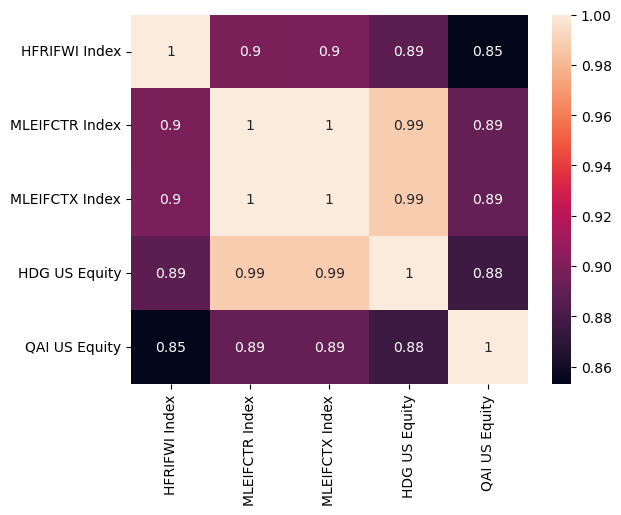

In [5]:
import seaborn as sns
%matplotlib inline

sns.heatmap(proshares_analysis_data['hedge_fund_series'].corr(), annot=True)

print('Highest Correlation: HDG US Equity - MLEIFCTR Index/MLEIFCTX Index')
print('Lowest Correlation: QAI US Equity-HFRIFWI Index')

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

def merrill_lin_reg(y):
    X = np.array(proshares_analysis_data['merrill_factors'])
    reg = LinearRegression().fit(X, y)
    intercept = reg.intercept_
    r_sq = reg.score(X, y)
    tracking_error = (y - reg.predict(X)).std()
    
    result_index = list(proshares_analysis_data['merrill_factors'].keys() + ' Beta')
    result_index.append('Intercept')
    result_index.append('R-Square')
    result_index.append('Tracking Error')
    
    result = list(reg.coef_)
    result.append(intercept)
    result.append(r_sq)
    result.append(tracking_error)
    
    return pd.Series(data=result, index=result_index)

proshares_analysis_data['hedge_fund_series'].apply(merrill_lin_reg)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
SPY US Equity Beta,0.036483,0.014802,0.013657,0.009848,0.128546
USGG3M Index Beta,0.146336,0.434300,0.391282,0.418932,0.834964
EEM US Equity Beta,0.081611,0.070013,0.070245,0.064648,0.065278
EFA US Equity Beta,0.084638,0.138988,0.139874,0.146611,0.068446
EUO US Equity Beta,0.028806,0.031632,0.031078,0.029400,-0.009239
IWM US Equity Beta,0.145111,0.128241,0.127174,0.137172,0.037507
Intercept,0.001235,0.000051,-0.000022,-0.000929,-0.001181
R-Square,0.839676,0.937317,0.936921,0.911191,0.836354
Tracking Error,0.006875,0.004057,0.004059,0.005025,0.005840


The betas are realistic position sizes and do not require huge long-short positions. All the funds are positively correlated with the underlying factors.

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [13]:
oos_returns = {}

for hf in proshares_analysis_data['hedge_fund_series'].columns:
    
    oos_returns[hf] = []
    
    for i in range(61, len(proshares_analysis_data['merrill_factors'])):

        y = np.array(proshares_analysis_data['hedge_fund_series'][hf].iloc[i-1-60:i-1])
        X = np.array(proshares_analysis_data['merrill_factors'].iloc[i-1-60:i-1])
        reg = LinearRegression().fit(X, y)
        intercept = reg.intercept_
        coeff = reg.coef_
        oos_returns[hf].append(np.array(proshares_analysis_data['merrill_factors'])@coeff.T + intercept)

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***